# part2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.initializers import RandomUniform

In [4]:
from tensorflow.python.keras.models import Sequential
#from tensorflow.keras.layers import Dense,LSTM,Dropout

In [5]:
#from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding,LSTM,Dropout
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [142]:
GivenData = pd.read_csv('GoogleStocks.csv')

In [143]:
GivenData = GivenData.iloc[::-1]

In [144]:
GivenData['avgHighLow'] = (GivenData['high']+GivenData['low'])/2

In [146]:
ConsideredGivenData  = GivenData[['date','avgHighLow','volume','open']]

In [147]:
#ConsideredGivenData  = GivenData[['date','avgHighLow','volume']]

In [148]:
ConsideredGivenDataShifted = ConsideredGivenData.shift(-1)

In [150]:
Xdata = ConsideredGivenData[['avgHighLow','volume']].values[0:-1]#,'open']]

In [11]:
#Xdata = ConsideredGivenData[['avgHighLow','volume','open']]#.values[0:-1]

In [151]:
Ydata = ConsideredGivenDataShifted['open'].values[:-1]

In [152]:
print(type(Xdata))
print(Xdata.shape)
#print(type(Ydata))
#print(Ydata.shape)
Ydata = Ydata.reshape(len(Ydata),1)
print(Ydata.shape)

<class 'numpy.ndarray'>
(754, 2)
(754, 1)


In [153]:
Xdata = np.c_[Xdata,Ydata]

In [154]:
Xdata

array([[7.35745000e+02, 1.30081700e+06, 7.34590000e+02],
       [7.38005000e+02, 1.90225400e+06, 7.50100000e+02],
       [7.53310000e+02, 1.78227800e+06, 7.49250000e+02],
       ...,
       [1.22247000e+03, 1.19589900e+06, 1.22632000e+03],
       [1.21641250e+03, 1.66891000e+06, 1.19693000e+03],
       [1.19671875e+03, 1.49384100e+06, 1.19853000e+03]])

In [155]:
Xtrain = Xdata[0:int(0.8*len(Xdata))]
Xtest = Xdata[int(0.8*len(Xdata)):]
#Ytrain = Ydata[0:int(0.8*len(Xdata))]
#Ytest = Ydata[int(0.8*len(Xdata)):]

In [156]:
len(Xtrain)

603

In [157]:
len(Xtest)

151

In [158]:
Xscaler = MinMaxScaler()
XtrainScaled = Xscaler.fit_transform(Xtrain)
XtestScaled = Xscaler.transform(Xtest)

In [122]:
XtrainScaled = Xtrain
XtestScaled = Xtest

In [159]:
from hmmlearn.hmm import GaussianHMM
from hmmlearn.hmm import GMMHMM

In [168]:
n_hidden_states = 8
n_latency_days = 20

In [23]:
#hmm1 = GaussianHMM(n_components=n_hidden_states,covariance_type="full")

In [156]:
#feature_vector = np.column_stack((XtrainScaled[:,0], XtrainScaled[:,1], XtrainScaled[:,2]))

In [29]:
len(XtrainScaled[:,0].reshape(-1,1))

603

In [161]:
X1 = XtrainScaled[:,0].reshape(-1,1)
X2 = XtrainScaled[:,1].reshape(-1,1)
X3 = XtrainScaled[:,2].reshape(-1,1)
X = np.concatenate([X1, X2, X3])
X = np.array(X)
lengths = [len(X1), len(X2), len(X3)]
hmm2 = GaussianHMM(n_components=3, covariance_type='full').fit(X, lengths)  
#hmm2.n_features = 4
hmm2.score(X,lengths)

1852.8576060167193

In [162]:
XtrainScaled.shape

(603, 3)

In [163]:
XtestScaled.shape

(151, 3)

n_hidden_states 4
timeSteps 20


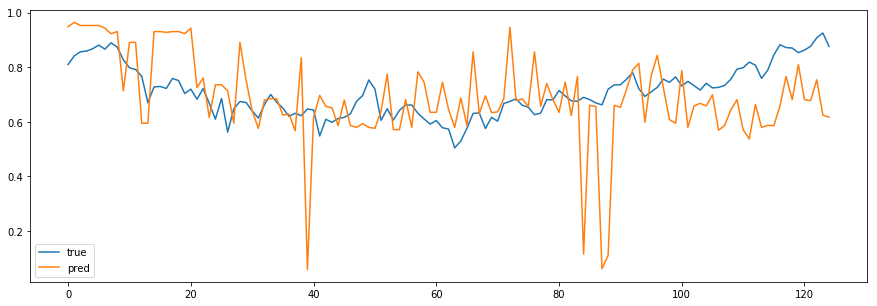

n_hidden_states 4
timeSteps 50


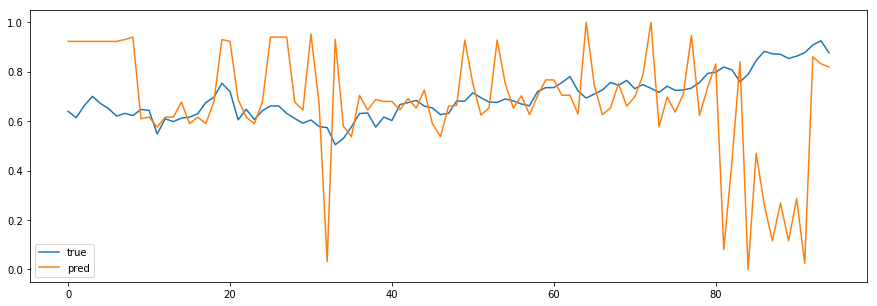

n_hidden_states 4
timeSteps 75


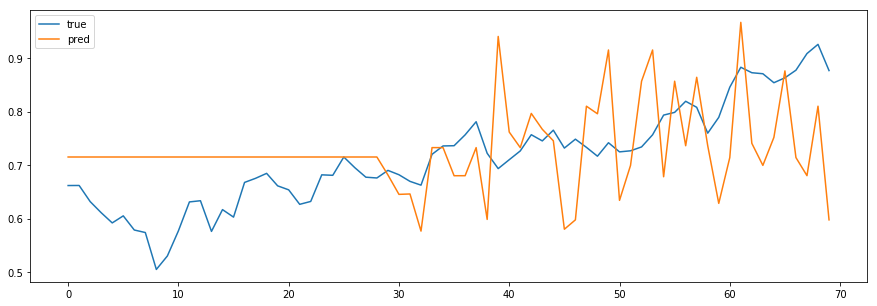

n_hidden_states 8
timeSteps 20


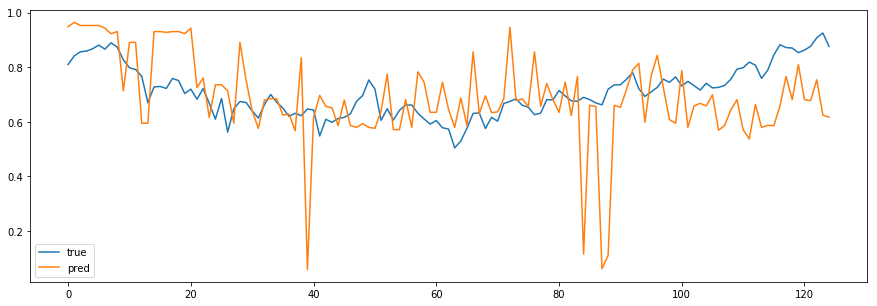

n_hidden_states 8
timeSteps 50


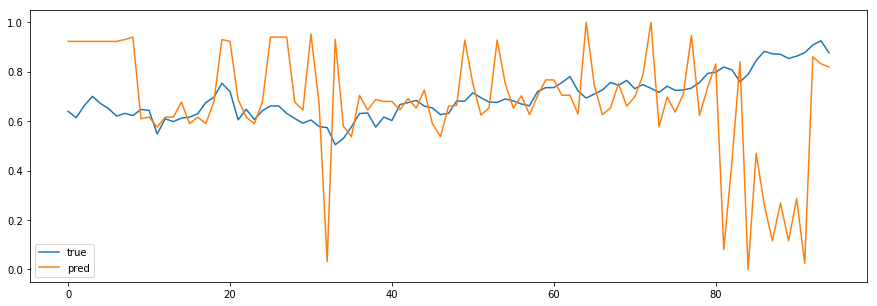

n_hidden_states 8
timeSteps 75


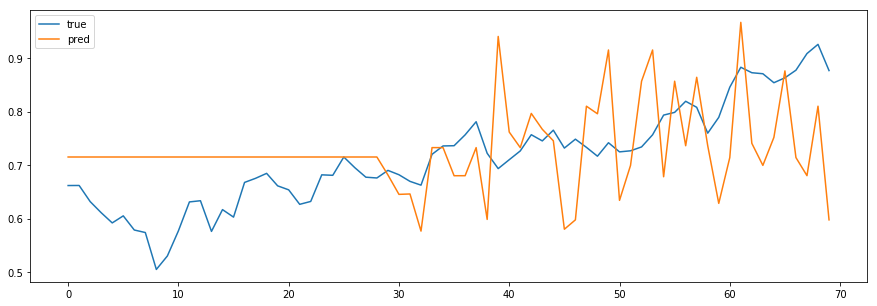

n_hidden_states 12
timeSteps 20


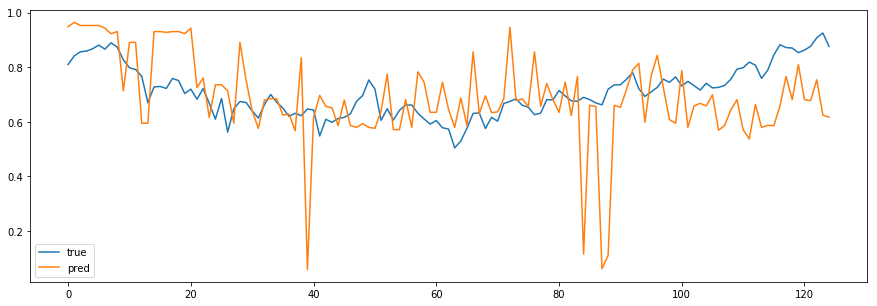

n_hidden_states 12
timeSteps 50


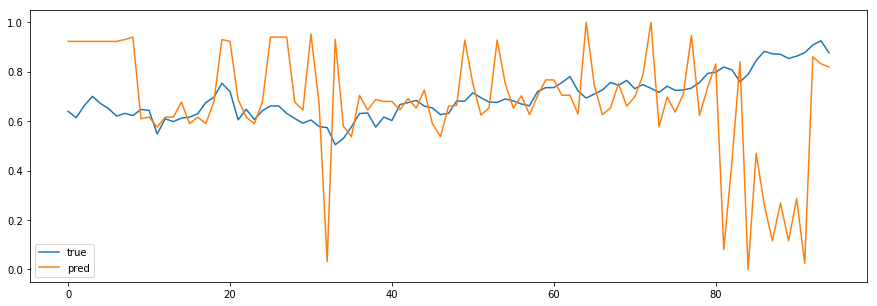

n_hidden_states 12
timeSteps 75


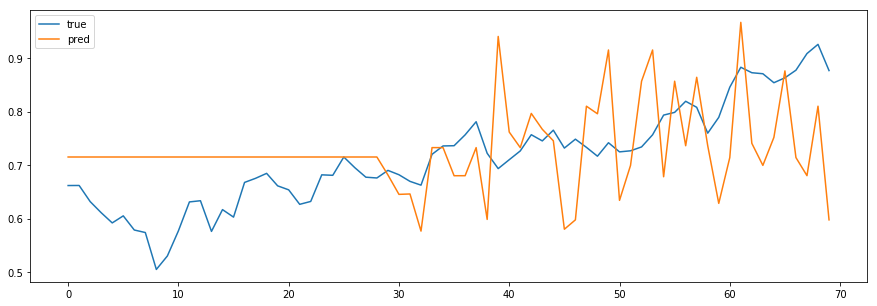

In [188]:
for n_hidden_states in [4,8,12]:
    for n_latency_days in [20,50,75]:
        max_score = -1000
        max_score_index = 602
        scores = []
        indexs = []
        for day_index in np.arange(602,n_latency_days+5,-1):    
            beginIndex = max(0, day_index - n_latency_days)
            endIndex = max(0, day_index - 1)
            X1 = XtrainScaled[beginIndex:endIndex,0].reshape(-1,1)
            X2 = XtrainScaled[beginIndex:endIndex,1].reshape(-1,1)
            X3 = XtrainScaled[beginIndex:endIndex,2].reshape(-1,1)
            X = np.concatenate([X1, X2, X3])
            #X = np.array(X)
            lengths = [len(X1), len(X2), len(X3)]
            #hmm2 = GaussianHMM(n_components=3, covariance_type='full').fit(X, lengths)  
            #hmm2.n_features = 4
            #if(hmm2.score(X,lengths))>max_score:
             #   max_score = hmm2.score(X,lengths)
              #  max_score_index = day_index
            scores.append(hmm2.score(X,lengths))
            indexs.append(day_index)
        #print(max_score_index)
        #print(max_score)
        
        minimum_score_difference_index = 602
        minimum_score_difference = 1000
        trueValues = []
        predValues = []
        for day_index in range(n_latency_days+5,150):  
            trueValues.append(XtestScaled[day_index,2])
            beginIndex = max(0, day_index - n_latency_days)
            endIndex = max(0, day_index - 1)
            X1 = XtestScaled[beginIndex:endIndex,0].reshape(-1,1)
            X2 = XtestScaled[beginIndex:endIndex,1].reshape(-1,1)
            X3 = XtestScaled[beginIndex:endIndex,2].reshape(-1,1)
            X = np.concatenate([X1, X2, X3])
            ScoreOfCurrentTrainIndex = hmm2.score(X,lengths)
            indexCount = 0
            minIndex = 0
            minScoreDifference = 1000
            minScoreIndex = 0
            for i in scores:
                if(abs(i-ScoreOfCurrentTrainIndex))<minScoreDifference:
                    minScoreDifference = abs(i-ScoreOfCurrentTrainIndex)
                    minIndex = indexCount
                indexCount += 1
            predValues.append(XtrainScaled[indexs[minIndex],2])
        #print(trueValues-predValues) 
        print('n_hidden_states '+str(n_hidden_states))
        print('timeSteps '+str(n_latency_days))
        plt.figure(figsize=(15,5))
        plt.plot(np.array(trueValues).reshape(-1,1), label='true')
        plt.plot(np.array(predValues).reshape(-1,1), label='pred')
        plt.legend()
        plt.show()

#for n_hidden_states in [4,8,12]:
#for n_latency_days in [20,50,75]:
n_hidden_states = 4
n_latency_days = 50